# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.158238e+01     7.015298e+00
 * time: 0.0022749900817871094
     1     2.976611e+01     4.386968e+00
 * time: 0.008038997650146484
     2     2.035028e+01     3.983504e+00
 * time: 0.012647151947021484
     3     1.505979e+01     4.063478e+00
 * time: 0.01743912696838379
     4     1.147498e+01     1.683898e+00
 * time: 0.021139144897460938
     5     1.141223e+01     3.028641e+00
 * time: 0.024209022521972656
     6     1.057583e+01     1.817518e+00
 * time: 0.027287006378173828
     7     9.465245e+00     1.823121e+00
 * time: 0.03042316436767578
     8     8.804477e+00     1.614717e+00
 * time: 0.03378415107727051
     9     8.546370e+00     1.524031e+00
 * time: 0.03752613067626953
    10     8.402144e+00     1.235054e+00
 * time: 0.041483163833618164
    11     8.183998e+00     9.142415e-01
 * time: 0.08867311477661133
    12     8.035825e+00     4.679237e-01
 * time: 0.09197616577148438
    13     7.984766e+00     4.384391e-01


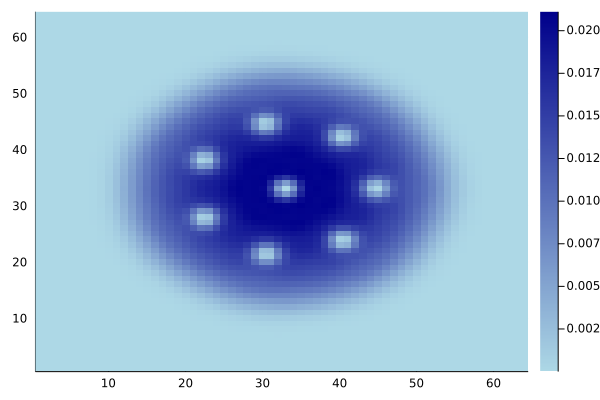

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)